## PCA, Pipelines & Model persistance

PCA technique is particularly useful in processing data where multi-colinearity exists between the features/variables. 

In [60]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import randint
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
# reading
df = pd.read_csv("housing_prices.csv") 

In [61]:
df = df.set_index('Id')
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [62]:
#data.columns
df['MSZoning'].apply(str)

Id
1       RL
2       RL
3       RL
4       RL
5       RL
        ..
1456    RL
1457    RL
1458    RL
1459    RL
1460    RL
Name: MSZoning, Length: 1460, dtype: object

In [63]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

## Train-test split

In [64]:
y = df['SalePrice'].copy()
X = df.drop(columns=['SalePrice']).copy()

In [65]:
#Data_Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1230000)
#X_train

In [66]:
# copy of train_X and test_X
train_X_original = X_train.copy()
test_X_original = X_test.copy()

## Pre-processing

In [67]:
# import
from sklearn.preprocessing import OneHotEncoder
# select categorical and numerical column names
X_cat_columns = X_train.select_dtypes(exclude="number").copy().columns
X_num_columns = X_train.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="median" and data scaling)
#scaler = StandardScaler(with_mean=False)
numeric_pipe = make_pipeline(MinMaxScaler(),SimpleImputer(strategy="median"))
 
 # create categorical pipeline
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),   
    OneHotEncoder(drop="first",handle_unknown='ignore', sparse = False))

In [68]:
from sklearn.compose import ColumnTransformer  #make_column_Transformer then dont need to mention names

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe , X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrL...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

In [69]:
full_pipeline = make_pipeline(preprocessor)

In [70]:
full_pipeline.fit(X_train, y_train) #training the machine

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1st...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))]))])

In [71]:
X_train_cleaned = full_pipeline.transform(X_train)
X_train_cleaned

array([[0.14705882, 0.12671233, 0.02374442, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.16438356, 0.03131646, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.18493151, 0.04370282, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.37328767, 0.04747482, ..., 0.        , 1.        ,
        0.        ],
       [0.05882353, 0.03082192, 0.01837856, ..., 0.        , 1.        ,
        0.        ],
       [0.17647059, 0.09931507, 0.03320947, ..., 0.        , 1.        ,
        0.        ]])

In [72]:
X_test_cleaned = full_pipeline.transform(X_test)
X_test_cleaned

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [5, 14, 15, 27] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.23529412, 0.19863014, 0.05374278, ..., 0.        , 1.        ,
        0.        ],
       [0.05882353, 0.15753425, 0.03494823, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.15068493, 0.03225128, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.17647059, 0.13013699, 0.07088738, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.19863014, 0.04201547, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20205479, 0.03879502, ..., 0.        , 1.        ,
        0.        ]])

In [73]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initiate transformer
X_train = scaler.fit_transform(X_train_cleaned) # scale data
X_test = scaler.transform(X_test_cleaned) # scale test set

## Modelling (iteration 1)

In [74]:
start_time = time.time()
neigh1 = KNeighborsClassifier()

param_distribs={"n_neighbors": randint(low=3, high=30),
                "weights":["uniform", "distance"],
                "p":[1,2]}

neigh1_search = RandomizedSearchCV(neigh1,
                                   param_distribs,
                                   scoring="accuracy",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=123)

neigh1_search.fit(X_train_cleaned, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(neigh1_search.best_score_, 2))

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


--- 1.9395203590393066 seconds ---
0.01


In [75]:
%%time

print("status")

status
Wall time: 0 ns


## PCA

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10) # pick number of components 
X_reduced = pca.fit_transform(X_train_cleaned)

In [77]:
X_reduced.shape

(1168, 10)

In [78]:
pd.DataFrame(X_reduced)

,0,1,2,3,4,5,6,7,8,9
0,-2.074030,1.472900,0.074419,0.461781,0.155231,0.412125,0.014498,0.408432,0.081113,-0.246773
1,0.425739,-0.401366,1.710173,-0.373847,-0.176356,0.436696,0.373291,-0.114748,-0.295237,-0.549023
2,-1.358385,-1.074137,-0.391025,-0.718673,0.090289,0.535149,0.423050,-0.703003,0.140582,0.959200
3,2.241771,-0.059351,1.148856,0.423026,-0.156881,0.163111,-0.762903,-0.311602,-0.094606,-0.560486
4,2.051366,-0.183908,0.075024,-1.255453,-0.195864,0.028112,-0.849307,0.317998,-0.197333,-0.396147
...,...,...,...,...,...,...,...,...,...,...
1163,-1.029752,-0.417506,-0.734615,-0.745671,-0.983482,-0.318892,-0.129395,-0.418698,1.094866,-0.119792
1164,0.063375,-0.131330,-0.162310,-0.558645,0.450694,0.053410,-0.400463,0.482129,0.246807,-0.265993
1165,0.094162,-1.400090,0.551999,-1.196101,0.953134,0.155193,0.427914,-0.156501,-0.199598,0.913258
1166,-1.605719,1.622829,-0.285490,-0.466634,0.384661,-0.744876,0.004329,-0.195208,-1.028900,0.158044


## Modelling (iteration 2)

In [79]:
start_time = time.time()
neigh2 = KNeighborsClassifier()

neigh2_search = RandomizedSearchCV(neigh2,
                                   param_distribs,
                                   scoring="accuracy",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=123)

neigh2_search.fit(X_reduced, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(neigh2_search.best_score_, 2))

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


--- 0.5731267929077148 seconds ---
0.01


### Picking the right number of components

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None) # pick number of components
X_reduced = pca.fit_transform(X_train_cleaned)

In [81]:
np.round(pca.explained_variance_ratio_, 4)*100

array([1.648e+01, 6.550e+00, 4.530e+00, 3.210e+00, 2.980e+00, 2.880e+00,
       2.550e+00, 2.380e+00, 2.300e+00, 2.150e+00, 2.110e+00, 1.850e+00,
       1.790e+00, 1.770e+00, 1.660e+00, 1.560e+00, 1.550e+00, 1.360e+00,
       1.310e+00, 1.270e+00, 1.200e+00, 1.170e+00, 1.090e+00, 1.030e+00,
       1.010e+00, 9.300e-01, 9.000e-01, 8.800e-01, 8.400e-01, 8.100e-01,
       7.900e-01, 7.800e-01, 7.600e-01, 7.000e-01, 6.800e-01, 6.500e-01,
       6.200e-01, 6.100e-01, 5.900e-01, 5.700e-01, 5.500e-01, 5.300e-01,
       5.200e-01, 5.100e-01, 5.000e-01, 4.800e-01, 4.700e-01, 4.500e-01,
       4.300e-01, 4.100e-01, 4.000e-01, 3.900e-01, 3.800e-01, 3.700e-01,
       3.600e-01, 3.500e-01, 3.500e-01, 3.400e-01, 3.300e-01, 3.200e-01,
       3.000e-01, 2.900e-01, 2.900e-01, 2.800e-01, 2.700e-01, 2.700e-01,
       2.700e-01, 2.500e-01, 2.500e-01, 2.500e-01, 2.400e-01, 2.400e-01,
       2.300e-01, 2.300e-01, 2.200e-01, 2.200e-01, 2.100e-01, 2.100e-01,
       2.000e-01, 2.000e-01, 2.000e-01, 1.900e-01, 

In [82]:
# compute the cumulative sum of explained variance ratio

# create a plot to visualize the cumulative sum of explained variance
# as the number of principal components increases

# How much variance do you want to keep in the data?
# How many components (dimensions) should you drop, considering computing power, the curse of dimensionality, overfitting..?

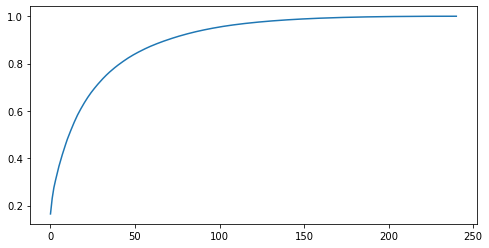

In [83]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(cumsum, label = "Explained variance");

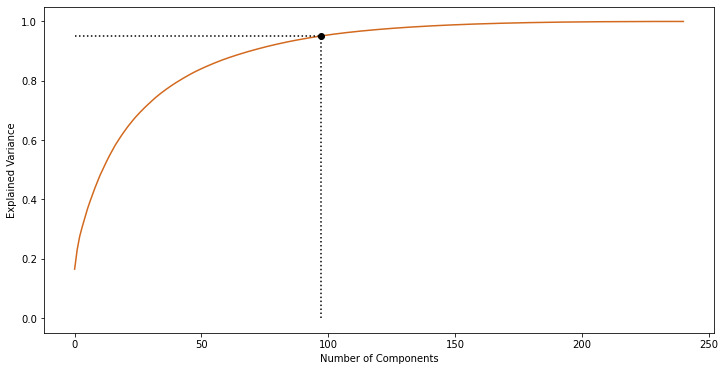

In [84]:
import matplotlib.pyplot as plt

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)

# create first figure and ax
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cumsum, label = "Explained variance", c="chocolate")

ax.annotate("Elbow?", xy=(270, 0.92), xytext=(280, 0.75),
             arrowprops=dict(arrowstyle="->"), fontsize=16)

ax.plot([d, d], [0, 0.95], "k:")
ax.plot([0, d], [0.95, 0.95], "k:")
ax.plot(d, 0.95, "ko")

ax.set_ylabel("Explained Variance")
ax.set_xlabel("Number of Components");

# Pre-processing + model pipeline

`make_pipeline()` is almost identical to `Pipeline()`: you can call as many transformers as you want (you don't even need to initialize them before) sequentially. Then, you can use fit(), transform() or fit_transform() as if it was only a single transformer.

`make_pipeline()` does't require explicit naming of the steps (generates the names automatically) - it can be used when we don't care about the names and simply want to create a quick pipeline.

In both cases, a model can be added at the end of the pipeline. You can then call the `fit()` method to the pipeline to apply all the transformations and fit the model, passing the X and y of the training set as arguments.

A pipeline with a model also has the `predict()` method available. Passing an X to that method (either the train or the test) will transform the data and output predictions.

#### Pre-processing pipeline

In [85]:
X_train_2 = X_train_original.copy()
X_test_2 = X_test_original.copy()

In [91]:
from sklearn.pipeline import make_pipeline

param_distribs={"n_neighbors": randint(low=3, high=30),
                "weights":["uniform", "distance"],
                "p":[1,2]}

neigh3_search = RandomizedSearchCV(KNeighborsClassifier(),
                                   param_distribs,
                                   scoring="accuracy",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=123)


model_pipeline = make_pipeline(StandardScaler(),
                                 PCA(n_components=0.98),
                                 neigh3_search)

In [106]:
X_train_cleaned1 = full_pipeline.transform(X_train_2)

In [107]:
model_pipeline.fit(X_train_2, y_train)

You can still access the randomized search cv scores, parameters...

In [94]:
model_pipeline["randomizedsearchcv"].best_score_

0.012857195260628737

In [95]:
model_pipeline["randomizedsearchcv"].best_params_

{'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}

### Cross validation: tuning the parameters in the pipeline

Some transformers in the pipeline

In [96]:
X_train_3 = X_train_original.copy()
X_test_3 = X_test_original.copy()

In [97]:
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline([("scaler", StandardScaler()),
                          ("pca", PCA()),
                          ("neigh", KNeighborsClassifier())])

param_grid = {
    "pca__n_components": [10, 30, 50, 100],
    "neigh__n_neighbors": [3, 15, 50, 80, 150]
}

In [98]:
neigh3_search = RandomizedSearchCV(model_pipeline,
                                   param_grid,
                                   scoring="accuracy",
                                   n_iter=10,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=123)

In [100]:
X_train_cleaned2 = full_pipeline.transform(X_train_3)

In [105]:
neigh3_search.fit(X_train_cleaned2, y_train)

In [103]:
neigh3_search.best_params_

{'pca__n_components': 30, 'neigh__n_neighbors': 150}

In [104]:
neigh3_search.best_score_

0.017989068632845457